In [1]:
import pickle
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
sys.path.append('../src')
from portfolio_opt_methods import mv_portfolio

(CVXPY) Jul 28 08:55:17 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jul 28 08:55:17 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
import os

def print_files_in_directory(directory):
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            print(filename)

In [3]:
path = '../raw/FinanceCPT/returns'
# print_files_in_directory(path)

In [4]:
files = ['manyinputs_returns800012000.csv',
         'random-rels_20_1_3_returns30007000.csv',
         'random-rels_20_1A_returns30007000.csv',
         'random-rels_20_1B_returns30007000.csv',
         'random-rels_20_1C_returns30007000.csv',
         'random-rels_20_1D_returns30007000.csv',
         'random-rels_20_1E_returns30007000.csv',
         'random-rels_40_1_3_returns30007000.csv',
         'random-rels_40_1_returns30007000.csv']

In [5]:
file = files[-2]

In [6]:
df = pd.read_csv(f'{path}/{file}', header = None)
df.columns = ['R'+str(x+1) for x in df.columns]
df += 25 # for all price values positive 

In [7]:
start_date = '2011-01-01' # if 30007000, else if 800012000 - 2022-01-01
dates = pd.date_range(start=start_date, periods=df.shape[0])
df['Date'] = dates
df.set_index('Date', inplace=True)

In [8]:
df

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,R16,R17,R18,R19,R20,R21,R22,R23,R24,R25
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,25.129999,25.991586,25.490534,26.030064,25.444978,26.208354,25.827543,26.338010,25.759437,25.541619,...,24.910472,25.507956,25.988139,25.987901,25.310424,24.970370,25.371462,25.130385,24.712043,24.242903
2011-01-02,25.117729,24.696028,23.841046,24.304467,24.993173,24.106540,24.393222,24.330050,24.412215,24.831289,...,24.467420,24.405815,24.426959,24.087432,23.228864,24.451421,24.642660,24.085394,24.583700,24.432658
2011-01-03,24.009068,23.909498,22.848235,25.322971,25.205248,23.973183,24.271724,24.578685,25.702066,24.168263,...,24.430101,23.436231,24.830879,25.388225,24.894043,24.304757,24.507440,24.795834,25.242243,24.077216
2011-01-04,26.940631,26.968976,26.331214,26.124436,27.065039,27.659311,24.170999,26.671530,26.285324,27.175950,...,27.218252,26.687753,26.694903,26.392545,27.065767,26.909475,26.802550,26.425452,27.481746,26.766724
2011-01-05,25.788248,25.041239,24.713395,25.937487,25.521661,24.521790,25.459863,25.542184,24.631251,26.290336,...,24.458882,25.405739,25.512512,26.254947,25.650985,23.577383,25.352320,25.771785,25.161796,25.056759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-09,25.559481,26.205592,25.268562,24.825953,25.235745,25.701546,24.872358,24.838170,24.719013,25.498747,...,24.882219,25.241188,25.614651,25.436675,25.125227,25.691437,25.604507,25.417331,24.872736,25.428656
2021-12-10,24.582310,24.882633,25.295772,25.599494,24.592462,24.872278,24.287918,24.660029,25.021263,24.873519,...,23.725238,23.919022,24.185191,23.789831,24.193573,24.249317,23.437188,23.488169,23.914448,23.117354
2021-12-11,24.829903,25.328069,25.327246,24.711667,24.219963,24.936539,24.713610,24.689627,24.565175,24.913398,...,24.937253,24.521813,25.363439,24.852244,24.634918,25.382026,24.452932,25.006479,25.405633,24.420686


In [9]:
# df.to_pickle('../cleaned/random-rels_40_1_3_returns30007000.pkl')

In [10]:
df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11',
               '2021-12-12', '2021-12-13'],
              dtype='datetime64[ns]', name='Date', length=4000, freq=None)

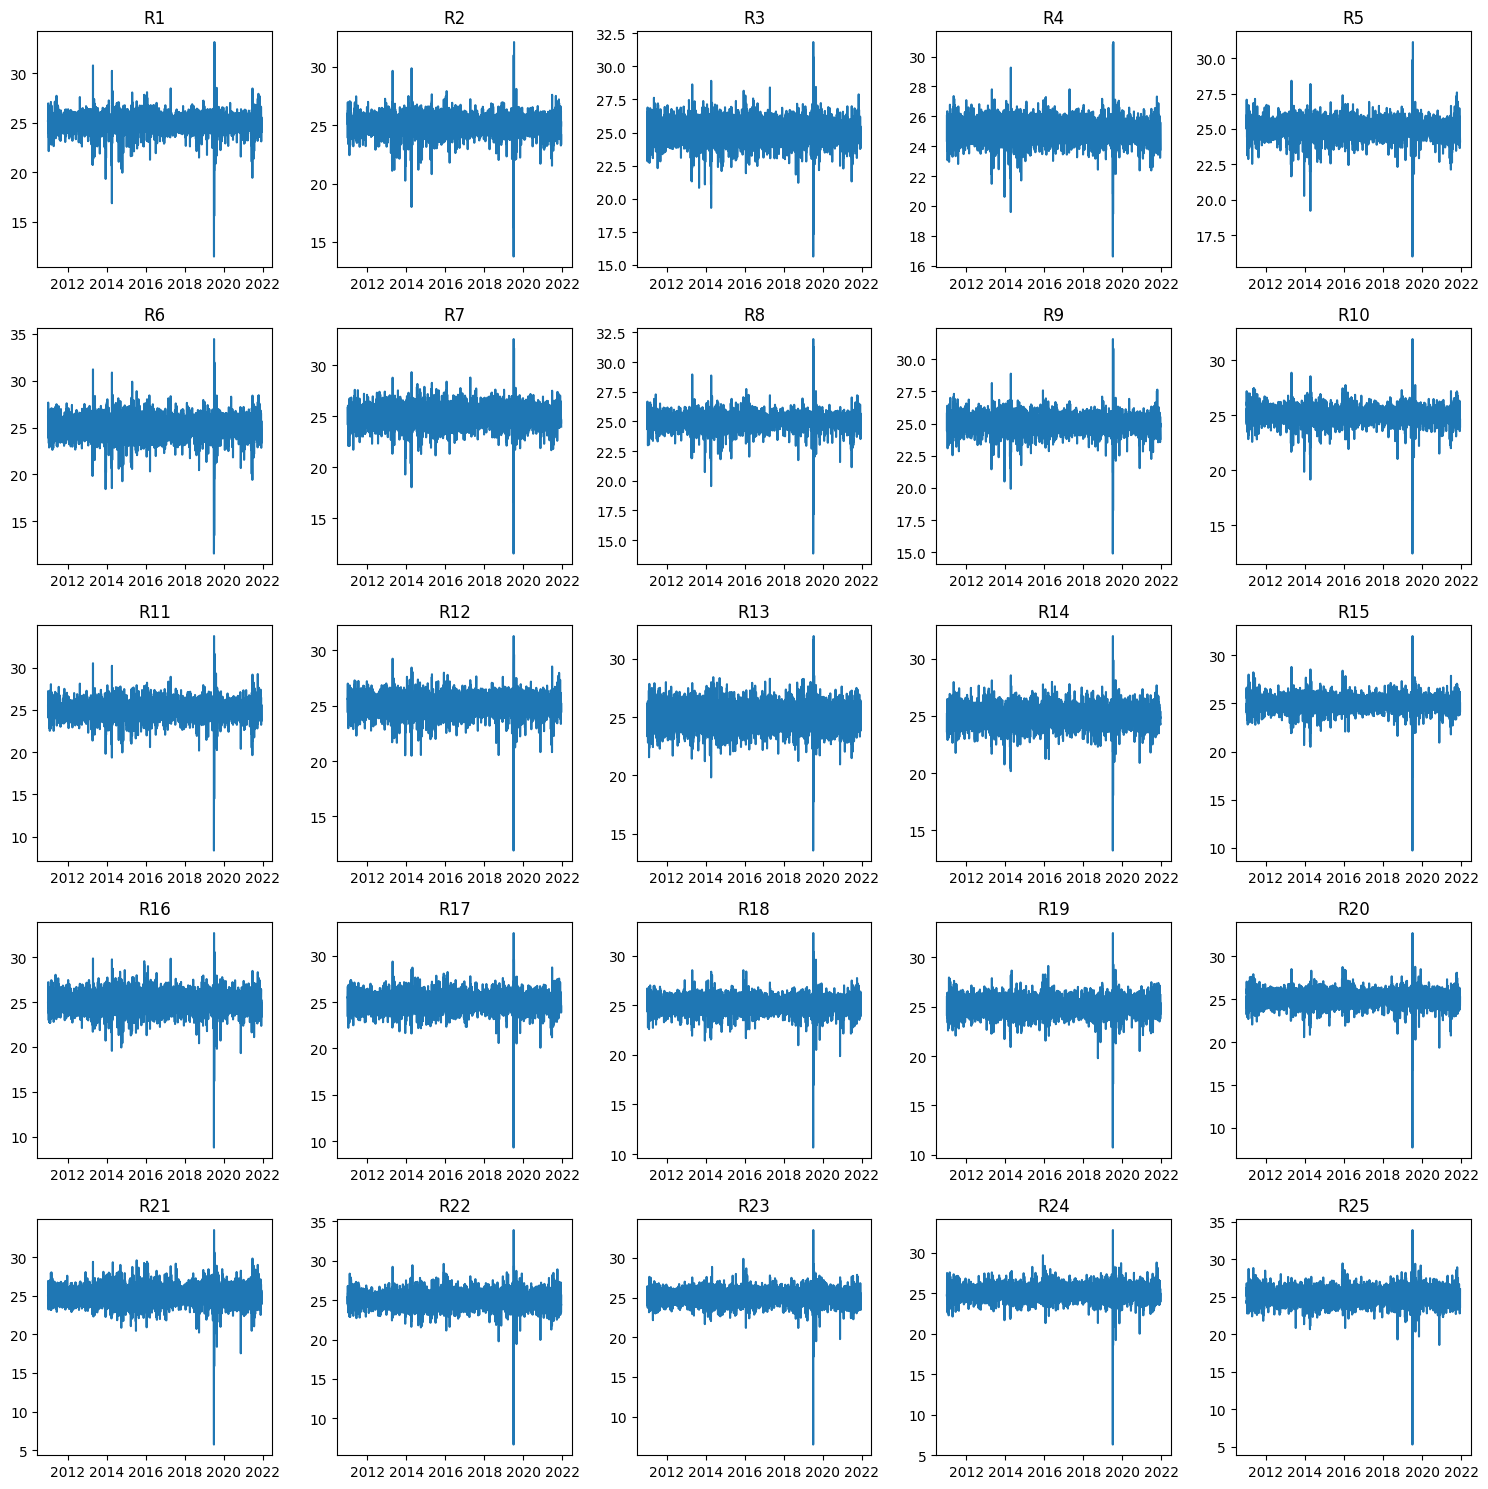

In [11]:
fig, axs = plt.subplots(round(df.shape[1] / 5), 5, figsize=(15, 15)) # Creating a 5x5 subplots
axs = axs.ravel() # to iterate over the 5x5 matrix easily

for i in range(df.shape[1]): # Iterate through each subplot
    axs[i].plot(df.iloc[:, i]) # Plot the i-th column time series on the i-th subplot
    axs[i].set_title(df.columns[i]) # Set the title to the column name

plt.tight_layout() # To prevent overlapping labels
plt.show() # Show the plot

# Tygramite

In [12]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI
from tigramite.rpcmci import RPCMCI
from sklearn.linear_model import LinearRegression

In [13]:
data = df.values
T, N = df.shape
mask=None
var_names = df.columns

In [14]:
dataframe = pp.DataFrame(data, 
                         datatime = {0:np.arange(len(data))}, 
                         var_names=var_names)

In [15]:
# ParCorr() - 1
# RobustParCorr() - 2

# from tigramite.independence_tests.parcorr_wls import ParCorrWLS - 3 - wtf expert_knowledge
# parcorr_wls = ParCorrWLS(expert_knowledge=expert_knowledge, 
#                          window_size=50,
#                          significance='analytic') 


# gpdc = GPDC(significance='analytic', gp_params=None) - 4
# cmi_knn = CMIknn(significance='shuffle_test', knn=0.1, shuffle_neighbors=5, transform='ranks', sig_samples=200) - 5


In [16]:
parcorr = ParCorr(significance='analytic')
# parcorr = RobustParCorr()
# parcorr = GPDC(significance='analytic', gp_params=None)
# parcorr = CMIknn(significance='shuffle_test', knn=0.1, shuffle_neighbors=5, transform='ranks', sig_samples=200)



pcmci = PCMCI(dataframe=dataframe, cond_ind_test=parcorr, verbosity=1)


results = pcmci.run_pcmci(tau_max=9, pc_alpha=None)
# results = pcmci.run_fullci(tau_max=3)
# results = pcmci.run_bivci(tau_max=3) #-  Bivariate lagged conditional independence - 4


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 9
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable R1 has 22 link(s):
    [pc_alpha = 0.4]
        (R1 -4): max_pval = 0.00000, min_val =  0.083
        (R21 -1): max_pval = 0.00066, min_val =  0.054
        (R22 -1): max_pval = 0.00282, min_val =  0.047
        (R23 -1): max_pval = 0.02793, min_val =  0.035
        (R25 -7): max_pval = 0.02864, min_val =  0.035
        (R23 -4): max_pval = 0.04490, min_val =  0.032
        (R8 -1): max_pval = 0.05975, min_val =  0.030
        (R11 -1): max_pval = 0.08487, min_val =  0.027
        (R15 -1): max_pval = 0.10062, min_val =  0.026
        (R19 -5): max_pval = 0.10385, min_val =  0.026
        (R24 -3): max_pval = 0.14227, min_val =  0.023
        (R3 -4): max_pval = 0.19886, min_val = -0.020
        (R14 -8): max_pval = 0.20028, mi

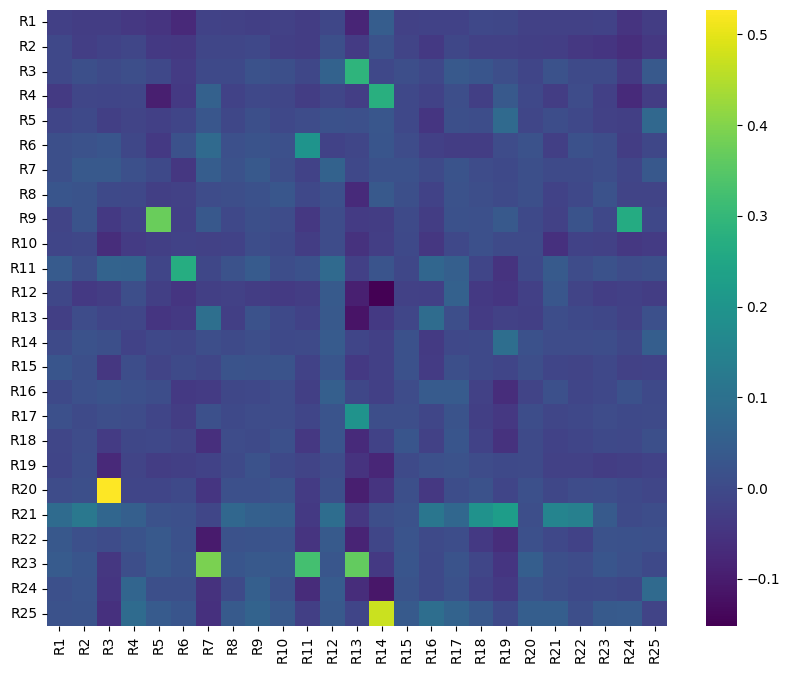

In [17]:
val_matrix = results['val_matrix'].round(3)
PCMCI_matrix = pd.DataFrame(val_matrix[:,:,1])
PCMCI_matrix.columns = var_names
PCMCI_matrix.index = var_names

plt.figure(figsize=(10,8)) # you can adjust the figure size as per your requirements
sns.heatmap(PCMCI_matrix, cmap='viridis')
plt.show()